# 什么是 Tensor

    Rank（秩）来表示这种“维度”

# Tensor 的类型、创建及转换

## Tensor 的类型
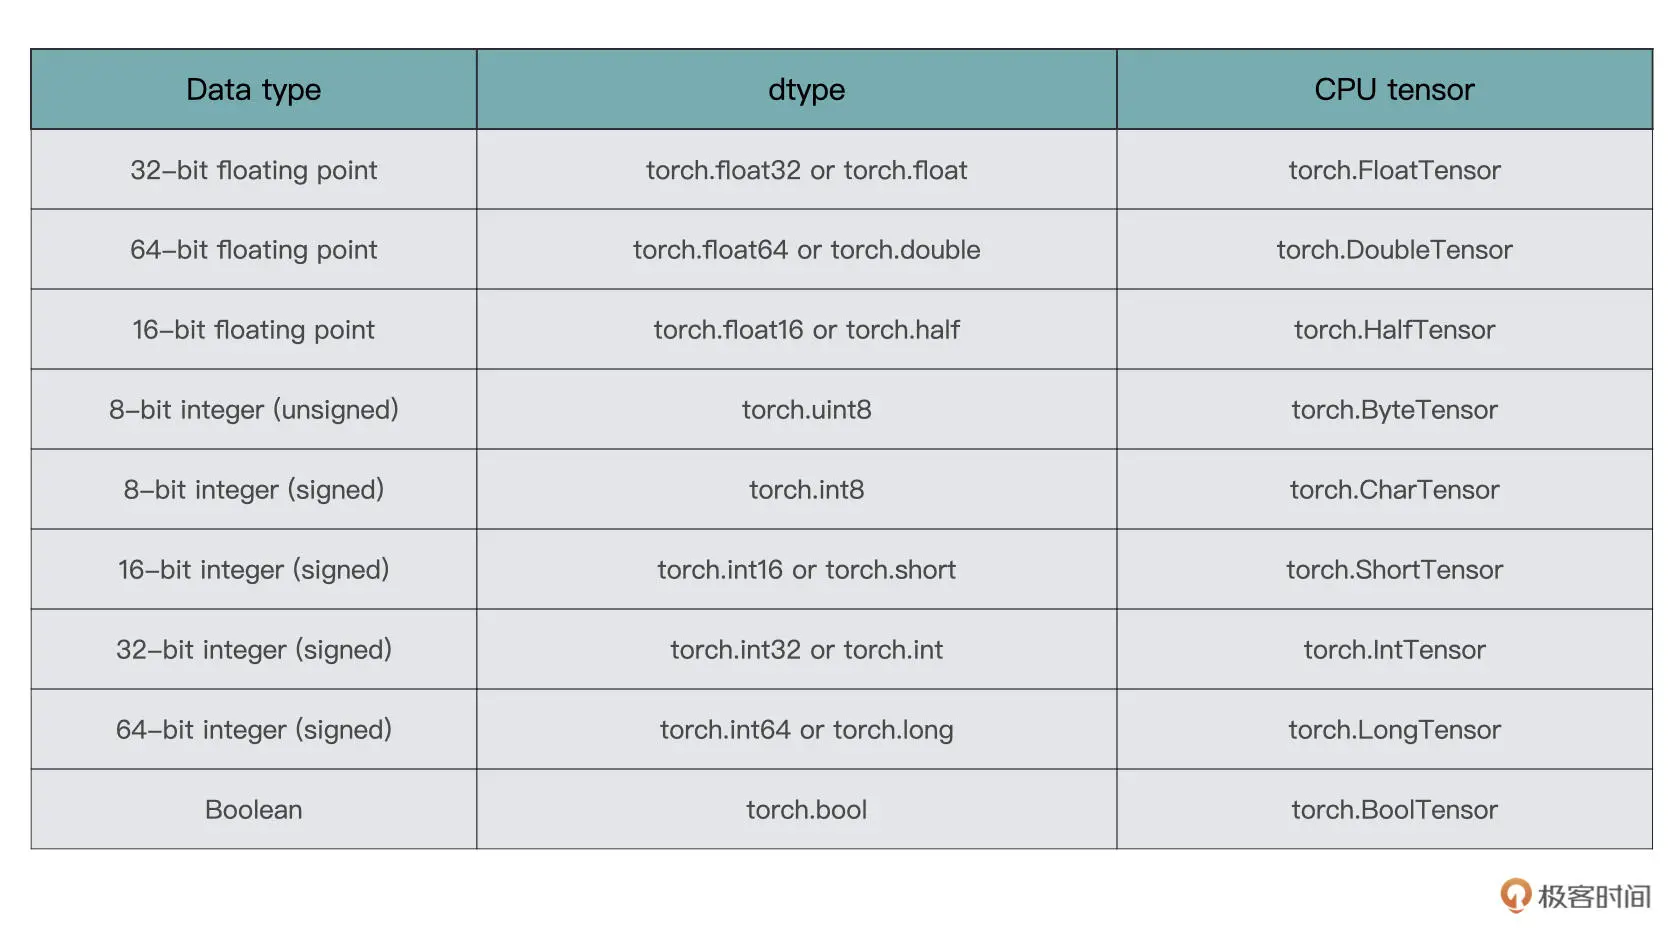

##  直接创建

>torch.tensor(data, dtype=None, device=None,requires_grad=False)


### 从 NumPy 中创建

>torch.from_numpy(ndarry)

### 创建特殊形式的 Tensor

* 创建零矩阵 Tensor：零矩阵顾名思义，就是所有的元素都为 0 的矩阵。

>torch.zeros(*size, dtype=None...)

* 创建单位矩阵 Tensor：单位矩阵是指主对角线上的元素都为 1 的矩阵。

>torch.eye(size, dtype=None...)


* 创建全一矩阵 Tensor：全一矩阵顾名思义，就是所有的元素都为 1 的矩阵


>torch.ones(size, dtype=None...)

* 创建随机矩阵 Tensor


>torch.rand(size)
>torch.randn(size)
>torch.normal(mean, std, size)
>torch.randint(low, high, size）
    
    torch.rand 用于生成数据类型为浮点型且维度指定的随机 Tensor，随机生成的浮点数据在 0~1 区间均匀分布。
    torch.randn 用于生成数据类型为浮点型且维度指定的随机 Tensor，随机生成的浮点数的取值满足均值为 0、方差为 1 的标准正态分布
    torch.normal 用于生成数据类型为浮点型且维度指定的随机 Tensor，可以指定均值和标准差。
    torch.randint 用于生成随机整数的 Tensor，其内部填充的是在[low,high) 均匀生成的随机整数。

## Tensor 的转换

    int、list、NumPy 是如何与 Tensor 互相转换的
    
* Int 与 Tensor 的转换：

>a = torch.tensor(1)
>b = a.item()

* list 与 tensor 的转换：


>a = [1, 2, 3]
>b = torch.tensor(a)
>c = b.numpy().tolist()

* NumPy 与 Tensor 的转换：


>CPU->GPU: data.cuda()
>GPU->CPU: data.cpu()

## Tensor 的常用操作

### 获取形状
> shape / size
> numel

In [32]:
import torch
a=torch.zeros(2, 3, 5)
print(a.shape)
a.size()


torch.Size([2, 3, 5])


torch.Size([2, 3, 5])

### 矩阵转秩 (维度转换）

> permute() 

> transpose()

    permute，它每次只能转换两个维度，或者说交换两个维度的数据

### 形状变换

>view
>reshape

In [33]:
x = torch.randn(4, 4)
x.shape

torch.Size([4, 4])

In [34]:
x

tensor([[-0.0983, -0.0274, -0.8466,  0.1165],
        [ 1.0502, -0.2563,  0.2125, -0.3518],
        [ 0.5523,  0.0444, -1.3085,  0.8168],
        [-0.9397,  1.1856, -0.6070,  0.3384]])

In [35]:
x = x.view(2,8)
x.shape

torch.Size([2, 8])

In [36]:
x = x.permute(1,0)
x.shape

torch.Size([8, 2])

In [37]:
x.view(4, 4)

RuntimeError: view size is not compatible with input tensor's size and stride (at least one dimension spans across two contiguous subspaces). Use .reshape(...) instead.

   
* view 不能处理内存不连续 Tensor 的结构
* reshape 相当于进行了两步操作，先把 Tensor 在内存中捋顺了，然后再进行 view 操作。

### 增减维度

>squeeze() 
>unsqueeze()\

    dim 指定的维度的值为 1，则将该维度删除，若指定的维度值不为 1，则返回原来的 Tensor。

In [38]:
x = torch.rand(2,1,3)
x.shape

torch.Size([2, 1, 3])

In [39]:
x

tensor([[[0.9723, 0.9850, 0.5705]],

        [[0.1075, 0.3028, 0.7802]]])

In [40]:
y = x.squeeze(1)
y.shape

torch.Size([2, 3])

In [41]:
y

tensor([[0.9723, 0.9850, 0.5705],
        [0.1075, 0.3028, 0.7802]])

In [42]:
z = y.squeeze(1)
z.shape

torch.Size([2, 3])

In [43]:
z

tensor([[0.9723, 0.9850, 0.5705],
        [0.1075, 0.3028, 0.7802]])

In [44]:
x = torch.rand(2,1,3)
print(x.shape)
y = x.permute(1,0,2)
print(y.shape)
z = y.squeeze(0)
z.shape

torch.Size([2, 1, 3])
torch.Size([1, 2, 3])


torch.Size([2, 3])

In [45]:
d = z.unsqueeze(2)
d.shape

torch.Size([2, 3, 1])

# 小结

    NumPy 和 Tensor 的用途是不一样的，NumPy 不能用于 GPU 加速，Tensor 则可以。
    Tensor 的创建、类型、转换、变换等常用功能

# 每课一练

    在 PyTorch 中，有 torch.Tensor() 和 torch.tensor() 两种函数，它们的区别是什么呢？
    
        torch.Tensor是默认tensor类型的torch.FloatTensor别名,  可以直接从给定数据中创建出FloatTensor的tensor， 
        torch.tensor是创建会根据输入的数据类型判断
        
        
        torch.Tensor() 是Tensor类的构造方法，通过构造方法创建Tensor对象的实例；
        torch.tensor()则是Tensor类内部的一个方法，方法的返回值是Tensor类型
        torch.tensor是函数，调用之后会对参数中的数据做拷贝，生成相应的张量并返回这个张量。

# todo
    
    去看看tensor源码的实现